In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("../data/train.csv")

In [52]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [59]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [65]:
df['passenger_count'].value_counts()

passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64

In [67]:
df['vendor_id'].value_counts()

vendor_id
2    780302
1    678342
Name: count, dtype: int64

array([[<Axes: title={'center': 'vendor_id'}>,
        <Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'pickup_longitude'}>],
       [<Axes: title={'center': 'pickup_latitude'}>,
        <Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>],
       [<Axes: title={'center': 'trip_duration'}>, <Axes: >, <Axes: >]],
      dtype=object)

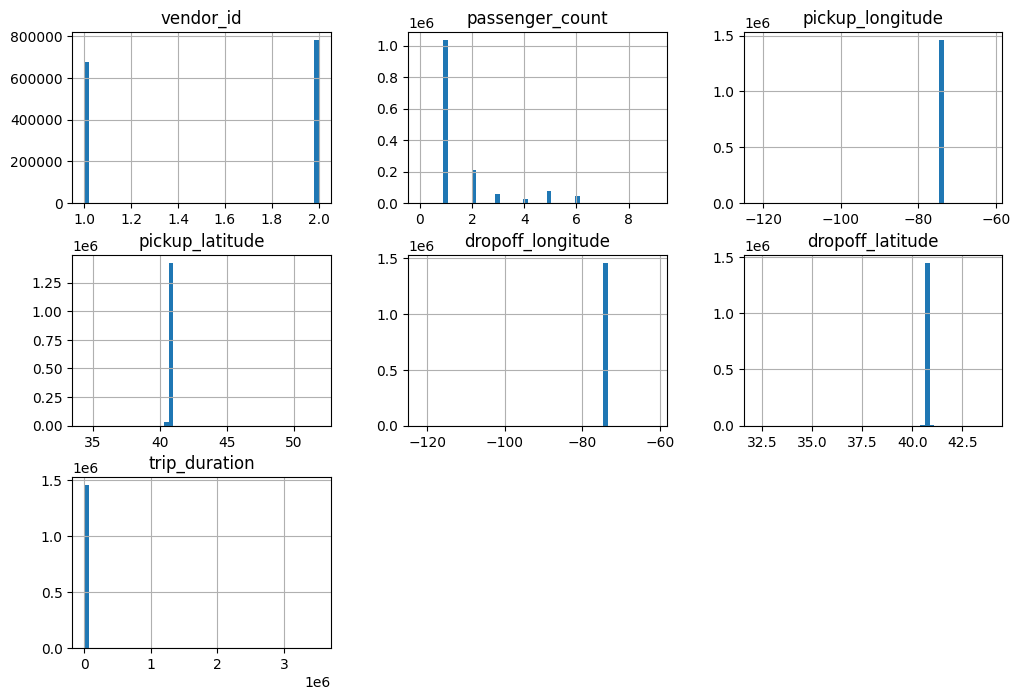

In [69]:
df.hist(bins=50, figsize=(12,8)) #Gives the Histogram of featuers 

In [81]:
def shuffle_and_split(data, test_ratio):
    np.random.seed(42) # set the seed for reproducibility
    shuffled_indices = np.random.permutation(len(data)) # this return the shuffled indices
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [83]:
train , test = shuffle_and_split(df, 0.4)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875187 entries, 670732 to 121958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  875187 non-null  object 
 1   vendor_id           875187 non-null  int64  
 2   pickup_datetime     875187 non-null  object 
 3   dropoff_datetime    875187 non-null  object 
 4   passenger_count     875187 non-null  int64  
 5   pickup_longitude    875187 non-null  float64
 6   pickup_latitude     875187 non-null  float64
 7   dropoff_longitude   875187 non-null  float64
 8   dropoff_latitude    875187 non-null  float64
 9   store_and_fwd_flag  875187 non-null  object 
 10  trip_duration       875187 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 80.1+ MB


In [97]:
df = train.copy()

D:\Users\hp\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


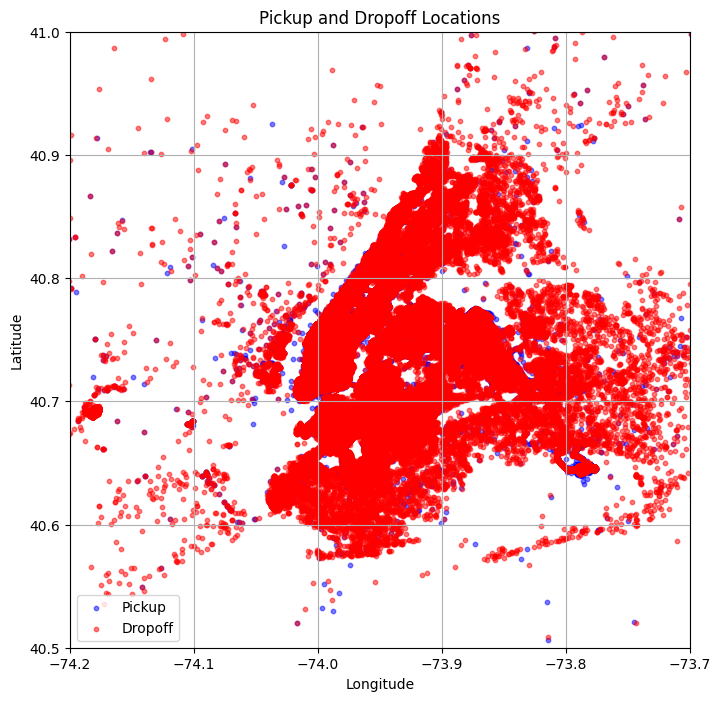

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=10, c='blue', alpha=0.5, label='Pickup')
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=10, c='red', alpha=0.5, label='Dropoff')

plt.xlim(-74.2, -73.7)  # NYC bounds
plt.ylim(40.5, 41)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.title('Pickup and Dropoff Locations')
plt.grid(True)
plt.show()

In [123]:
locs = pd.DataFrame({
    'lat1':df['pickup_longitude'],
    'lon1':df['pickup_latitude'],
    'lat2':df['dropoff_longitude'],
    'lon2':df['pickup_latitude']
})

In [115]:

def haversine_vector(lat1, lon1, lat2, lon2, radius=6371):
    """
    Calculate the great-circle distance between two sets of coordinates
    using the Haversine formula (vectorized).

    Parameters
    ----------
    lat1, lon1 : array-like
        Latitudes & longitudes of the first set of points (in degrees).
    lat2, lon2 : array-like
        Latitudes & longitudes of the second set of points (in degrees).
    radius : float
        Earth radius in kilometers (default 6371 km). Use 3956 for miles.

    Returns
    -------
    numpy.ndarray
        Distances in kilometers (same shape as input arrays).
    """
    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Compute differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return radius * c


In [129]:
locs['distance_km'] = haversine_vector(locs.lat1, locs.lon1, locs.lat2, locs.lon2)
locs.head()

,lat1,lon1,lat2,lon2,distance_km
670732,-73.781631,40.644848,-73.988060,40.644848,22.953805
1116926,-73.985283,40.723553,-73.975433,40.723553,1.095220
573845,-73.986282,40.742828,-73.871162,40.742828,12.800753
64951,-73.950233,40.779861,-73.996193,40.779861,5.110460
35535,-73.982208,40.740139,-73.977905,40.740139,0.478469


In [127]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_km
670732,id0570804,2,2016-06-15 11:28:41,2016-06-15 13:07:17,2,-73.781631,40.644848,-73.988060,40.757236,N,5916,22.953805
1116926,id1240020,1,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-73.985283,40.723553,-73.975433,40.755489,N,687,1.095220
573845,id1510937,1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-73.986282,40.742828,-73.871162,40.774216,N,2276,12.800753
64951,id3909687,2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-73.950233,40.779861,-73.996193,40.726009,N,1384,5.110460
35535,id3757092,1,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-73.982208,40.740139,-73.977905,40.746174,N,154,0.478469


In [131]:
def add_day_and_duration(data,pic_time,drop_time):
    data[pic_time] = pd.to_datetime(data[pic_time])
    data[drop_time] = pd.to_datetime(data[drop_time])
    data['week_day'] = data[pic_time].dt.day_name()
    data['pic_drop_time'] = (data[drop_time] - data[pic_time]).dt.total_seconds()
    return data

In [143]:
df['pickup_datetime']

670732     2016-06-15 11:28:41
1116926    2016-02-23 07:00:39
573845     2016-05-05 15:51:18
64951      2016-01-31 19:31:24
35535      2016-04-23 09:22:37
                  ...         
259178     2016-03-25 07:11:49
1414414    2016-02-16 18:01:45
131932     2016-01-26 19:22:29
671155     2016-01-19 11:53:47
121958     2016-02-10 22:39:31
Name: pickup_datetime, Length: 875187, dtype: object

In [145]:
df = add_day_and_duration(df, 'pickup_datetime', 'dropoff_datetime')

In [149]:
df.head(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance_km,week_day,pic_drop_time
670732,id0570804,2,2016-06-15 11:28:41,2016-06-15 13:07:17,2,-73.781631,40.644848,-73.988060,40.757236,N,5916,22.953805,Wednesday,5916.0
1116926,id1240020,1,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-73.985283,40.723553,-73.975433,40.755489,N,687,1.095220,Tuesday,687.0
573845,id1510937,1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-73.986282,40.742828,-73.871162,40.774216,N,2276,12.800753,Thursday,2276.0
64951,id3909687,2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-73.950233,40.779861,-73.996193,40.726009,N,1384,5.110460,Sunday,1384.0
35535,id3757092,1,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-73.982208,40.740139,-73.977905,40.746174,N,154,0.478469,Saturday,154.0
127664,id3662683,1,2016-03-01 20:36:25,2016-03-01 20:55:39,2,-73.983170,40.777641,-73.938675,40.819790,N,1154,4.947577,Tuesday,1154.0
218006,id0134538,1,2016-03-02 13:56:50,2016-03-02 14:30:39,1,-74.004112,40.742062,-73.861984,40.768486,N,2029,15.803912,Wednesday,2029.0
759705,id0672412,1,2016-05-26 22:15:37,2016-05-26 22:27:00,2,-73.970978,40.758392,-73.988434,40.739990,N,683,1.941025,Thursday,683.0
344976,id3693148,1,2016-04-13 13:48:11,2016-04-13 14:22:30,2,-73.872948,40.774029,-73.975357,40.757462,Y,2059,11.387402,Wednesday,2059.0
712134,id2311535,1,2016-04-28 22:57:03,2016-04-28 23:05:06,4,-74.005035,40.707417,-73.987900,40.721142,N,483,1.905394,Thursday,483.0


In [151]:
df.drop("pic_drop_time", axis=1, inplace=True)

In [174]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
670732,id0570804,2,2016-06-15 11:28:41,2016-06-15 13:07:17,2,-73.781631,40.644848,-73.988060,40.757236,N,5916
1116926,id1240020,1,2016-02-23 07:00:39,2016-02-23 07:12:06,1,-73.985283,40.723553,-73.975433,40.755489,N,687
573845,id1510937,1,2016-05-05 15:51:18,2016-05-05 16:29:14,1,-73.986282,40.742828,-73.871162,40.774216,N,2276
64951,id3909687,2,2016-01-31 19:31:24,2016-01-31 19:54:28,2,-73.950233,40.779861,-73.996193,40.726009,N,1384
35535,id3757092,1,2016-04-23 09:22:37,2016-04-23 09:25:11,1,-73.982208,40.740139,-73.977905,40.746174,N,154


In [188]:
df["pickup_datetime"].dtype

dtype('<M8[ns]')

In [190]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875187 entries, 670732 to 121958
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  875187 non-null  object 
 1   vendor_id           875187 non-null  int64  
 2   pickup_datetime     875187 non-null  object 
 3   dropoff_datetime    875187 non-null  object 
 4   passenger_count     875187 non-null  int64  
 5   pickup_longitude    875187 non-null  float64
 6   pickup_latitude     875187 non-null  float64
 7   dropoff_longitude   875187 non-null  float64
 8   dropoff_latitude    875187 non-null  float64
 9   store_and_fwd_flag  875187 non-null  object 
 10  trip_duration       875187 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 112.4+ MB
